In [97]:
import pyodbc 
import configparser;
import pandas as pd

config = configparser.ConfigParser()
config.read("config.ini")

databasename = config.get('DB', 'dbname');
server = config.get('DB', 'dbserver');
driver = config.get('DB', 'dbdriver'); 

username = config.get('evohome', 'username');
password = config.get('evohome', 'password');

CONNECTION_STRING = 'DRIVER=' + driver + '; SERVER=' + server + '; DATABASE=' + databasename + '; Trusted_Connection=yes';

cnxn = pyodbc.connect(CONNECTION_STRING)

sSQL = 'select * from  dbo.Zones'
print(sSQL)

df = pd.read_sql_query(sSQL, cnxn)

select * from  dbo.Zones


C:\Users\holts\AppData\Local\Temp\ipykernel_3360\2510848438.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sSQL, cnxn)


In [98]:
len(df)

1141288

In [99]:
from IPython.display import display

dflatest = df['timestamp'] > "2025/02/01";

display(df)

#filtered_df = df.loc[(df['timestamp'] >= '2024-09-28') & (df['name'] == 'Hall')]

filtered_df = df.loc[(df['timestamp'] >= '2025-02-01')]

display(filtered_df);

,uid,timestamp,thermostat,id,name,temp,setpoint
0,48E348EA-F5CE-4B4E-B9AB-838966C2F024,2020-11-13 14:04:00.403,DOMESTIC_HOT_WATER,5995532,,22.0,
1,D4245C3E-6460-45F3-8DD3-7A0968CB8FC3,2020-11-13 14:04:00.407,EMEA_ZONE,5990599,Landing,20.0,16.0
2,993C2DC6-AAF2-429C-BCC9-87DAD370537C,2020-11-13 14:04:00.410,EMEA_ZONE,5990600,Guest B&B,16.0,16.0
3,B12F5277-B898-4F85-8F6C-EE3630C54A23,2020-11-13 14:04:00.413,EMEA_ZONE,5990601,Boys Room,19.5,16.0
4,1F54F8ED-F2B3-46BD-A9BC-5F19A51CB63D,2020-11-13 14:04:00.417,EMEA_ZONE,5990602,Kids Bath,20.5,16.0
...,...,...,...,...,...,...,...
1141283,E1F0460E-FFF3-4800-8FBA-970C1B05F453,2025-03-04 20:56:08.067,EMEA_ZONE,9078629,Main Bath,18.0,18.0
1141284,58B5FBAA-482C-48A7-BCE7-B4B2C32F8711,2025-03-04 20:56:08.067,EMEA_ZONE,9078630,Lounge,18.0,18.0
1141285,B7C37138-9A8B-4BC3-9E4D-8595DCABFF96,2025-03-04 20:56:08.067,EMEA_ZONE,9078631,Kitchen,18.0,18.0
1141286,49EAA747-C3D3-40A9-ACB0-6AC10114A291,2025-03-04 20:56:08.070,EMEA_ZONE,9078632,Study,18.0,18.0


,uid,timestamp,thermostat,id,name,temp,setpoint
1116250,038AF25D-4FDA-46D4-ADD6-A5B0539922B1,2025-02-24 14:00:07.993,DOMESTIC_HOT_WATER,9078635,,38.0,
1116251,FB5C2FC0-4CCA-42C2-8630-EFF71305B1FE,2025-02-24 14:00:08.003,EMEA_ZONE,9078622,Hall,18.0,18.0
1116252,FAFCB027-6AC3-45FD-A00F-72E137A06761,2025-02-24 14:00:08.003,EMEA_ZONE,9078623,Landing,18.5,18.0
1116253,E5F15082-CE2B-44D8-83AA-9C789A42E3D8,2025-02-24 14:00:08.007,EMEA_ZONE,9078624,Kids Room,18.0,18.0
1116254,C73189DB-9416-40A2-89D3-070EC0B0E166,2025-02-24 14:00:08.010,EMEA_ZONE,9078625,Main Room,18.0,18.0
...,...,...,...,...,...,...,...
1141283,E1F0460E-FFF3-4800-8FBA-970C1B05F453,2025-03-04 20:56:08.067,EMEA_ZONE,9078629,Main Bath,18.0,18.0
1141284,58B5FBAA-482C-48A7-BCE7-B4B2C32F8711,2025-03-04 20:56:08.067,EMEA_ZONE,9078630,Lounge,18.0,18.0
1141285,B7C37138-9A8B-4BC3-9E4D-8595DCABFF96,2025-03-04 20:56:08.067,EMEA_ZONE,9078631,Kitchen,18.0,18.0
1141286,49EAA747-C3D3-40A9-ACB0-6AC10114A291,2025-03-04 20:56:08.070,EMEA_ZONE,9078632,Study,18.0,18.0


In [100]:
col_one_list = filtered_df['name'] .unique().tolist()

for i in col_one_list:
    print(i)


Hall
Landing
Kids Room
Main Room
Popo
Playroom
Kids Bath
Main Bath
Lounge
Kitchen
Study
Utility Room


Empty string
Hall


C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['temp'] = filtered_room_df['temp'].astype(float)
C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['setpoint'] = filtered_room_df['setpoint'].astype(float)


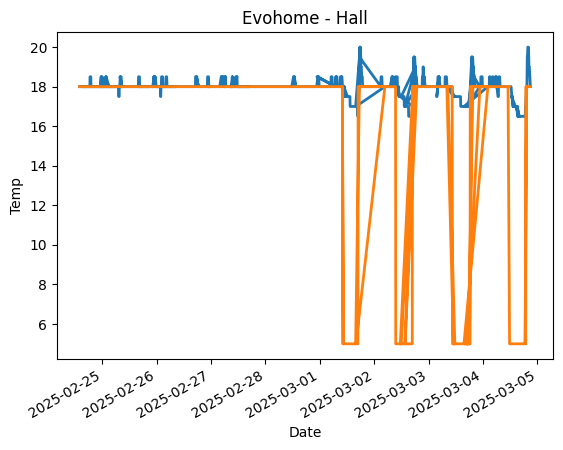

Landing


C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['temp'] = filtered_room_df['temp'].astype(float)
C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['setpoint'] = filtered_room_df['setpoint'].astype(float)


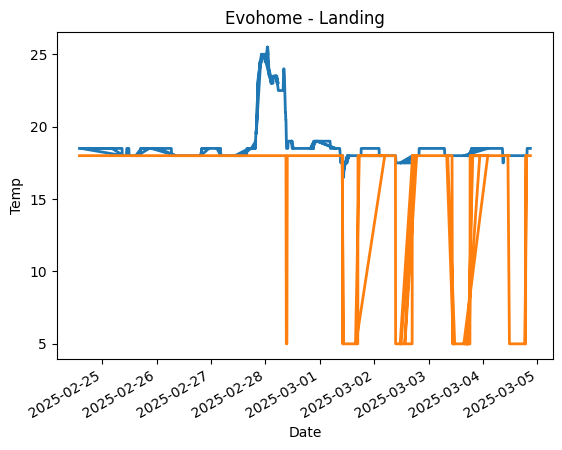

Kids Room


C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['temp'] = filtered_room_df['temp'].astype(float)
C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['setpoint'] = filtered_room_df['setpoint'].astype(float)


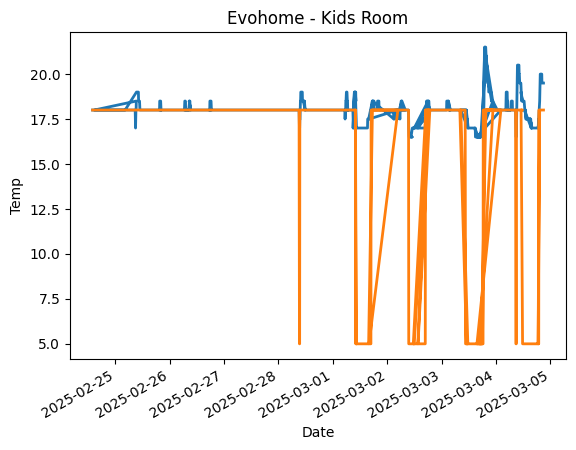

Main Room


C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['temp'] = filtered_room_df['temp'].astype(float)
C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['setpoint'] = filtered_room_df['setpoint'].astype(float)


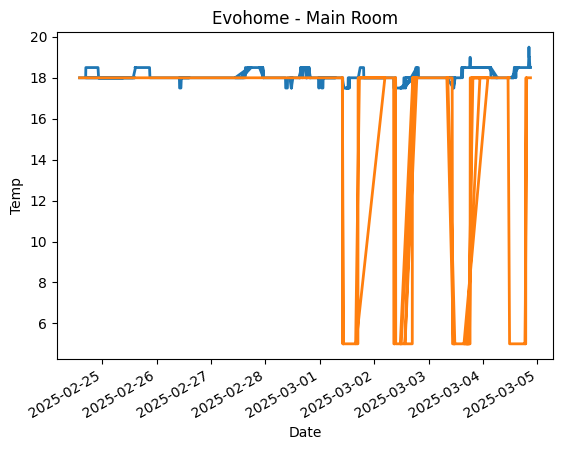

Popo


C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['temp'] = filtered_room_df['temp'].astype(float)
C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['setpoint'] = filtered_room_df['setpoint'].astype(float)


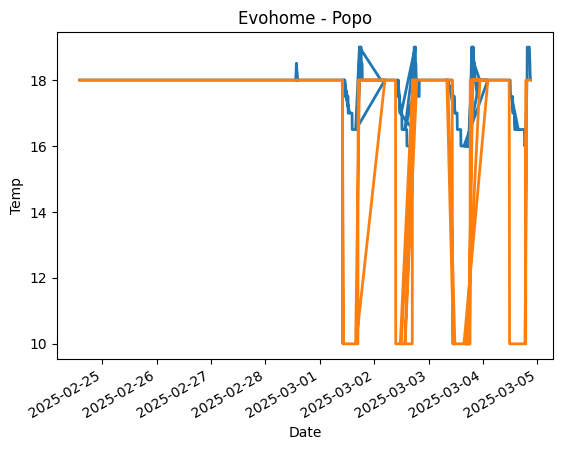

Playroom


C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['temp'] = filtered_room_df['temp'].astype(float)
C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['setpoint'] = filtered_room_df['setpoint'].astype(float)


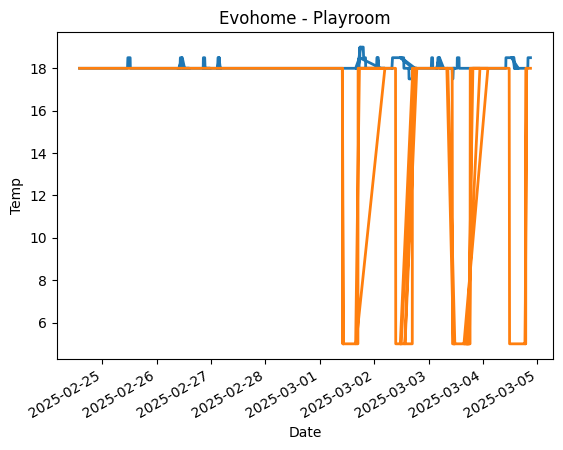

C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['temp'] = filtered_room_df['temp'].astype(float)
C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['setpoint'] = filtered_room_df['setpoint'].astype(float)


Kids Bath


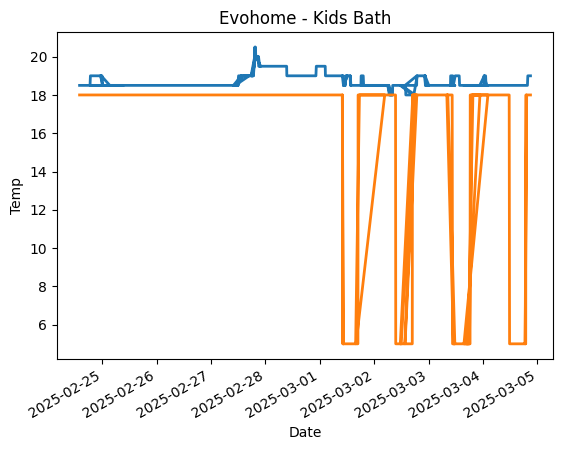

C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['temp'] = filtered_room_df['temp'].astype(float)
C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['setpoint'] = filtered_room_df['setpoint'].astype(float)


Main Bath


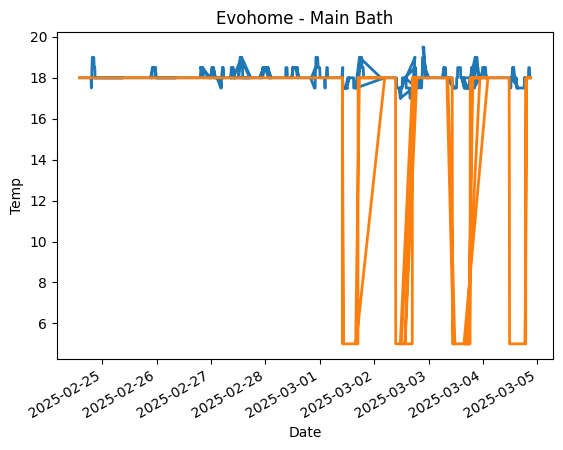

C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['temp'] = filtered_room_df['temp'].astype(float)
C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['setpoint'] = filtered_room_df['setpoint'].astype(float)


Lounge


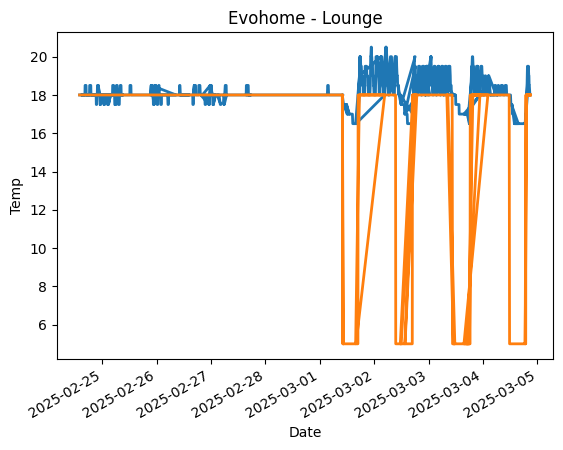

C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['temp'] = filtered_room_df['temp'].astype(float)
C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['setpoint'] = filtered_room_df['setpoint'].astype(float)


Kitchen


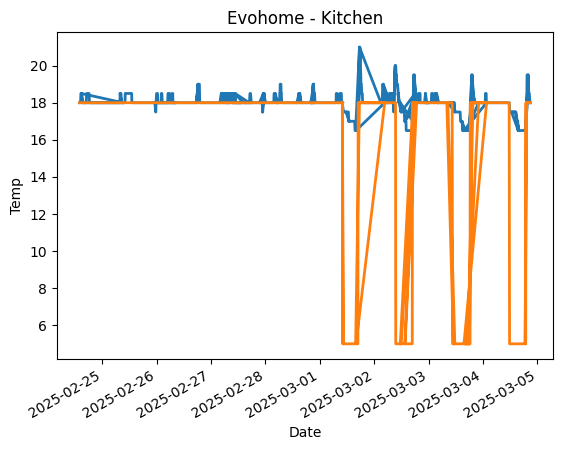

Study


C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['temp'] = filtered_room_df['temp'].astype(float)
C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['setpoint'] = filtered_room_df['setpoint'].astype(float)


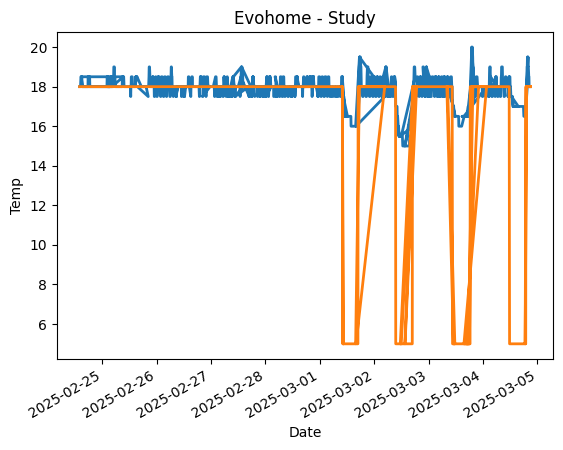

Utility Room


C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['temp'] = filtered_room_df['temp'].astype(float)
C:\Users\holts\AppData\Local\Temp\ipykernel_3360\3379425537.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_room_df['setpoint'] = filtered_room_df['setpoint'].astype(float)


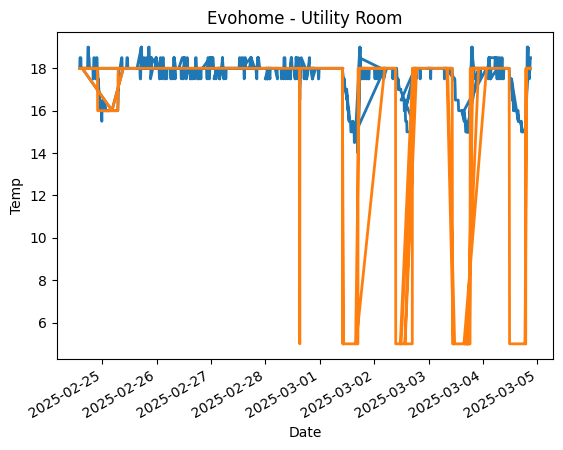

In [101]:
import matplotlib.pyplot as plt

col_one_list = filtered_df['name'] .unique().tolist()

for i in col_one_list:
    if not i:
        print("Empty string")
    else:
        print(i)

        filtered_room_df = filtered_df.loc[(filtered_df['name'] == i)]

        filtered_room_df['temp'] = filtered_room_df['temp'].astype(float)
        filtered_room_df['setpoint'] = filtered_room_df['setpoint'].astype(float)


        plt.plot(filtered_room_df['timestamp'], filtered_room_df['temp'], linewidth=2)
        plt.plot(filtered_room_df['timestamp'], filtered_room_df['setpoint'], linewidth=2)

        plt.gcf().autofmt_xdate();

        plt.title('Evohome - ' + i)
        plt.xlabel('Date')
        plt.ylabel('Temp')

        plt.show();

C:\Users\holts\AppData\Local\Temp\ipykernel_3360\2219587806.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hall_df['temp'] = filtered_hall_df['temp'].astype(float)
C:\Users\holts\AppData\Local\Temp\ipykernel_3360\2219587806.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hall_df['setpoint'] = filtered_hall_df['setpoint'].astype(float)


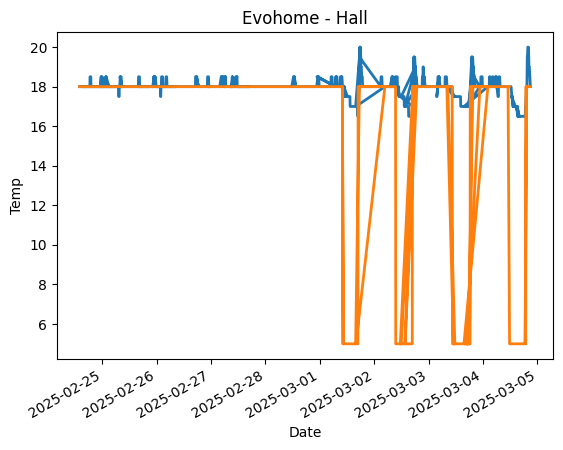

In [102]:
#pip install matplotlib

import matplotlib.pyplot as plt

filtered_hall_df = filtered_df.loc[(filtered_df['name'] == 'Hall')]

filtered_hall_df['temp'] = filtered_hall_df['temp'].astype(float)
filtered_hall_df['setpoint'] = filtered_hall_df['setpoint'].astype(float)


plt.plot(filtered_hall_df['timestamp'], filtered_hall_df['temp'], linewidth=2)
plt.plot(filtered_hall_df['timestamp'], filtered_hall_df['setpoint'], linewidth=2)

plt.gcf().autofmt_xdate();

plt.title('Evohome - Hall')
plt.xlabel('Date')
plt.ylabel('Temp')

plt.show();


C:\Users\holts\AppData\Local\Temp\ipykernel_3360\882280071.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_study_df['temp'] = filtered_study_df['temp'].astype(float)
C:\Users\holts\AppData\Local\Temp\ipykernel_3360\882280071.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_study_df['setpoint'] = filtered_study_df['setpoint'].astype(float)


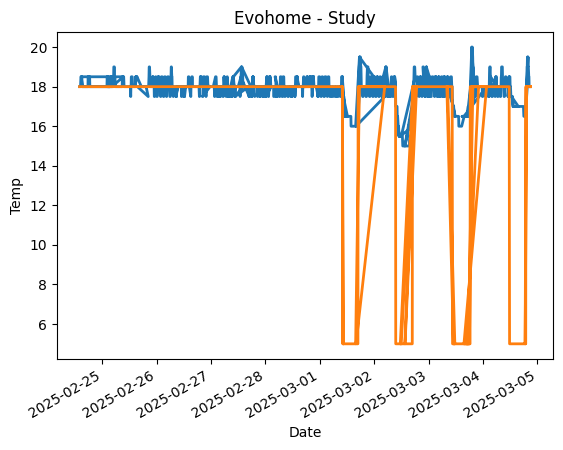

In [103]:
#pip install matplotlib

import matplotlib.pyplot as plt

filtered_study_df = filtered_df.loc[(filtered_df['name'] == 'Study')]

filtered_study_df['temp'] = filtered_study_df['temp'].astype(float)
filtered_study_df['setpoint'] = filtered_study_df['setpoint'].astype(float)


plt.plot(filtered_study_df['timestamp'], filtered_study_df['temp'], linewidth=2)
plt.plot(filtered_study_df['timestamp'], filtered_study_df['setpoint'], linewidth=2)

plt.title('Evohome - Study')
plt.xlabel('Date')
plt.ylabel('Temp')

plt.gcf().autofmt_xdate();

plt.show();

In [104]:
outfile = "evohome_export.csv"

filtered_df.to_csv(outfile, encoding='utf-8', index=False, header=True)